In [ ]:
import pandas as pd
import numpy as np


# data loading

I got the description of the columns from this link:
https://www.kaggle.com/datasets/kazanova/sentiment140

In [7]:
train=pd.read_csv("/content/train_data.csv",encoding='latin-1', header=None, sep=',')
test=pd.read_csv("/content/test_data.csv", encoding='latin-1', header=None)
train.columns=['target','ID','date','flag','user','text']
test.columns=['target','ID','date','flag','user','text']

In [8]:
train.head()

,target,ID,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# data preprocessing

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  20000 non-null  int64 
 1   ID      20000 non-null  int64 
 2   date    20000 non-null  object
 3   flag    20000 non-null  object
 4   user    20000 non-null  object
 5   text    20000 non-null  object
dtypes: int64(2), object(4)
memory usage: 937.6+ KB


Yay! We don't have any missing values

In [15]:
train["target"].value_counts()

,count
target,
4,10001
0,9999


So our dataset is balanced!

In [11]:
test['target'].unique()

array([4, 0, 2])

In [14]:
test['target'].value_counts()

,count
target,
4,182
0,177
2,139


we have to delete rows with the value 2 from the test dataset

In [16]:
test=test[test['target']!=2]

In [17]:
#test
test['target'].value_counts()

,count
target,
4,182
0,177


In [18]:
train['target'].replace({4:1},inplace=True)

<ipython-input-18-69cf0a3b6a4b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['target'].replace({4:1},inplace=True)


In [19]:
test['target'].replace({4:1}, inplace=True)

<ipython-input-19-1bc92f241ae1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['target'].replace({4:1}, inplace=True)


In [20]:
train["target"].unique()

array([0, 1])

In [21]:
#print some random sentences to understand how to preprocess the text
random=np.random.randint(0, 20000, size=20)
for i in random:
  print(train.loc[i,'text'])
  print('----------------------------------')

@Snappsgirl89 wait?!?!?! darn, I thought this counted as productive 
----------------------------------
Just scared my files will be gone by tomorrow  That'd be a nightmare. All the most important files are there!
----------------------------------
expect 5 stars for cafÃ©bola at chibugan.multiply.com 
----------------------------------
Watching a video of Demi singing Don't Forget aat the Wiltern Theater right now... So sad.  I think the tears are really going down...
----------------------------------
@laffroom Yay.I appreciate the offer but I'm just too lazy teehee 
----------------------------------
vbscript foiled by change managment dam you change managment and your anti alt+f4 blocking skills 
----------------------------------
Tweet4Today: &quot;Have a limbo party while you are still supple enough to get under that bar&quot; .... Still??? 
----------------------------------
why isn't BumpTop out for Mac yet? 
----------------------------------
C? g?ng l?t ?? ng?i d?y 
---------

In [22]:
import re

def preprocessor(text):
  text=re.sub(r'\s*@\w+', '', text)#remove words starting with @ from a text
  text=text.lower()
  return text


train['text']=train['text'].apply(preprocessor)

In [23]:
#test the preprocessor function
for i in random:
  print(train.loc[i,'text'])
  print('----------------------------------')

 wait?!?!?! darn, i thought this counted as productive 
----------------------------------
just scared my files will be gone by tomorrow  that'd be a nightmare. all the most important files are there!
----------------------------------
expect 5 stars for cafã©bola at chibugan.multiply.com 
----------------------------------
watching a video of demi singing don't forget aat the wiltern theater right now... so sad.  i think the tears are really going down...
----------------------------------
 yay.i appreciate the offer but i'm just too lazy teehee 
----------------------------------
vbscript foiled by change managment dam you change managment and your anti alt+f4 blocking skills 
----------------------------------
tweet4today: &quot;have a limbo party while you are still supple enough to get under that bar&quot; .... still??? 
----------------------------------
why isn't bumptop out for mac yet? 
----------------------------------
c? g?ng l?t ?? ng?i d?y 
-------------------------------

In [24]:
#tokenizer

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Initialize the stemmer
stemmer = PorterStemmer()

# Define a custom tokenizer that includes stemming
def stemmed_words(doc):
    return [stemmer.stem(word) for word in word_tokenize(doc)]


In [25]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
#tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



tfidf=TfidfVectorizer(use_idf=True,
                       norm='l2',
                       smooth_idf=True,
                       stop_words=stop,
                       tokenizer=stemmed_words,
                      max_features=1000)



In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

nb_tfidf = Pipeline([('tfidf', tfidf),
                     ('mnb', MultinomialNB())])

In [29]:
import nltk
nltk.download('punkt')
nb_tfidf.fit(train['text'],train['target'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=1000,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function stemmed_words at 0x7a3d8ae5f6d0>)),
                ('mnb', MultinomialNB())])

In [30]:
from sklearn import metrics
predictions=nb_tfidf.predict(test['text'])
print(metrics.classification_report(test['target'], predictions))

              precision    recall  f1-score   support

           0       0.82      0.68      0.75       177
           1       0.74      0.86      0.79       182

    accuracy                           0.77       359
   macro avg       0.78      0.77      0.77       359
weighted avg       0.78      0.77      0.77       359



<Axes: >

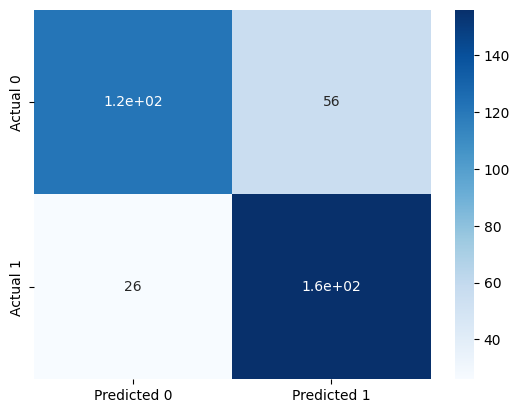

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(test['target'], predictions)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

##linear regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

lr_tfidf = Pipeline([('tfidf', tfidf),
                     ('mnb', LogisticRegression())])
lr_tfidf.fit(train['text'],train['target'])
from sklearn import metrics
predictions=lr_tfidf.predict(test['text'])
print(metrics.classification_report(test['target'], predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

           0       0.83      0.71      0.77       177
           1       0.75      0.86      0.80       182

    accuracy                           0.79       359
   macro avg       0.79      0.78      0.78       359
weighted avg       0.79      0.79      0.78       359



<Axes: >

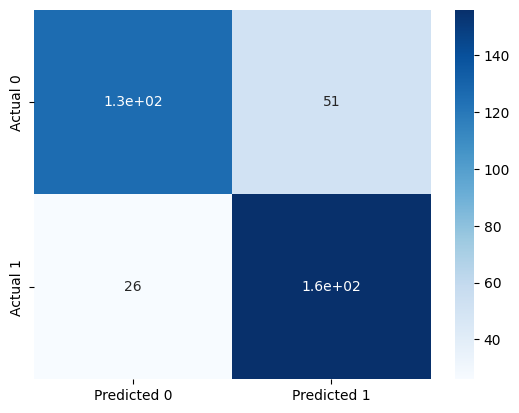

In [33]:
cm=confusion_matrix(test['target'], predictions)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

In [41]:
pr=lr_tfidf.predict(['Down with Israel'])
print('positive' if pr==1 else 'negative')

positive


In [39]:
pr=lr_tfidf.predict(['I am so happy today'])
print('positive' if pr==1 else 'negative')

positive


In [40]:
pr=lr_tfidf.predict(['fuck you'])
print('positive' if pr==1 else 'negative')

negative


In [42]:
pr=lr_tfidf.predict(['Your answer really disappointed me.'])
print('positive' if pr==1 else 'negative')

negative


In [43]:
pr=lr_tfidf.predict(['I am so sad:)'])
print('positive' if pr==1 else 'negative')

negative
